# Using YOLOv8 as a Data Labeler

In [1]:
!nvidia-smi

Mon Nov 20 18:24:56 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 537.34                 Driver Version: 537.34       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4090      WDDM  | 00000000:01:00.0  On |                  Off |
|  0%   39C    P0              44W / 500W |   6380MiB / 24564MiB |      6%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

c:\Users\Ryan Barry\OneDrive - rit.edu\Laptop Backup\Desktop\RIT\Robot Perception\Project\air-hockey-robot\data_collection


# Install YOLOv8 if it isn't already installed

In [3]:
!pip install -U ultralytics==8.0.58

from IPython.display import display, Image, clear_output
clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

Ultralytics YOLOv8.0.58  Python-3.10.11 torch-2.1.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
Setup complete  (24 CPUs, 63.8 GB RAM, 1321.1/1862.2 GB disk)


# Load the Air Hockey model

In [4]:
YOLO_DIR = os.path.abspath(os.path.join(HOME, os.pardir, f"YOLOv8"))

BEST_RUN = "yolov8n_air_hockey21"
WEIGHTS_PATH = os.path.abspath(os.path.join(YOLO_DIR, "runs/detect", BEST_RUN, "weights/best.pt"))

model = YOLO(WEIGHTS_PATH)

# Import the training image file info as a DataFrame

In [5]:
import pandas as pd

file_df = pd.read_csv(os.path.abspath(os.path.join(HOME, "training_file_paths.csv")))

file_df.head()

,File Name,Time
0,image_0000000.jpg,11:47:02.306
1,image_0000001.jpg,11:47:02.381
2,image_0000002.jpg,11:47:02.419
3,image_0000003.jpg,11:47:02.451
4,image_0000004.jpg,11:47:02.486


# Load images from the dataframe

In [6]:
from PIL import Image

IMAGE_DIR = f"{HOME}/training_data/"

def open_and_resize_image(file_path, size=(480,480)):
    # Open the image
    image = Image.open(file_path)
    
    # Resize the image
    resized_image = image.resize(size)
    
    # Return the resized image
    return resized_image

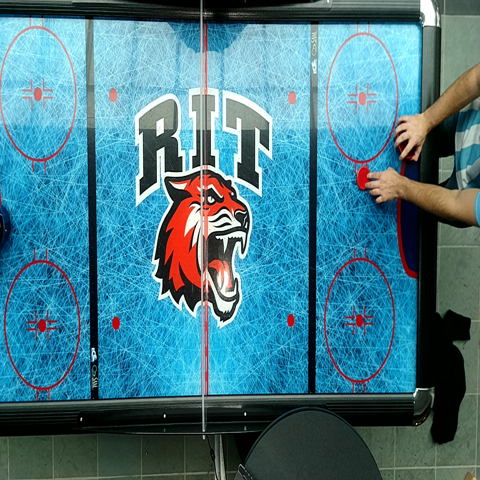

In [19]:
file_path = IMAGE_DIR + file_df.iloc[1000]["File Name"]

# Open and resize the image
resized_image = open_and_resize_image(file_path)

resized_image

In [24]:
# results = model.predict(source=resized_image, save=False, save_txt=False, save_conf=False)
results = model(resized_image)


0: 480x480 1 P, 1 T, 16.0ms
Speed: 1.0ms preprocess, 16.0ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 480)


In [26]:
for r in results:
    print(r.boxes)  # print the Boxes object containing the detection bounding boxes

ultralytics.yolo.engine.results.Boxes object with attributes:

boxes: tensor([[ 82.0464,  15.5917, 315.9346, 394.9558,   0.9603,   1.0000],
        [355.7515, 165.3294, 370.9403, 190.2910,   0.7900,   0.0000]], device='cuda:0')
cls: tensor([1., 0.], device='cuda:0')
conf: tensor([0.9603, 0.7900], device='cuda:0')
data: tensor([[ 82.0464,  15.5917, 315.9346, 394.9558,   0.9603,   1.0000],
        [355.7515, 165.3294, 370.9403, 190.2910,   0.7900,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: tensor([480, 480], device='cuda:0')
shape: torch.Size([2, 6])
xywh: tensor([[198.9905, 205.2738, 233.8882, 379.3641],
        [363.3459, 177.8102,  15.1888,  24.9616]], device='cuda:0')
xywhn: tensor([[0.4146, 0.4277, 0.4873, 0.7903],
        [0.7570, 0.3704, 0.0316, 0.0520]], device='cuda:0')
xyxy: tensor([[ 82.0464,  15.5917, 315.9346, 394.9558],
        [355.7515, 165.3294, 370.9403, 190.2910]], device='cuda:0')
xyxyn: tensor([[0.1709, 0.0325, 0.6582, 0.8228],
        [0.7411,